<a href="https://colab.research.google.com/github/sayevvv/PCVK_2025/blob/main/PCVK_Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cell 1: Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cell 2: Import Libraries

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Cell 3: Implementasi dan Tampilan Global Threshold Manual

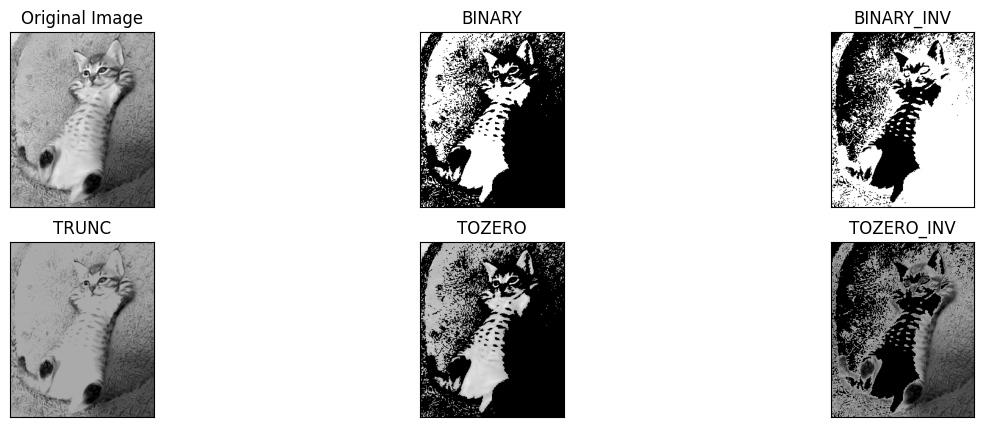

In [6]:
# Tentukan path gambar dan threshold
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img = cv2.imread(img_path, 0) # Baca sebagai grayscale

# Check if image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {img_path}")
else:
    # Tentukan threshold dan maxval
    thresh = 170
    maxval = 255

    # 1. Binary Threshold (Manual)
    # dst(x,y) = maxval jika src(x,y) > thresh, 0 jika lainnya
    thresh_binary = np.zeros_like(img)
    thresh_binary[img > thresh] = maxval

    # 2. Binary-Inverted Threshold (Manual)
    # dst(x,y) = 0 jika src(x,y) > thresh, maxval jika lainnya
    thresh_binary_inv = np.zeros_like(img)
    thresh_binary_inv[img <= thresh] = maxval

    # 3. Truncate Threshold (Manual)
    # dst(x,y) = thresh jika src(x,y) > thresh, src(x,y) jika lainnya
    thresh_trunc = img.copy()
    thresh_trunc[img > thresh] = thresh

    # 4. Threshold To Zero (Manual)
    # dst(x,y) = src(x,y) jika src(x,y) > thresh, 0 jika lainnya
    thresh_tozero = img.copy()
    thresh_tozero[img <= thresh] = 0

    # 5. Threshold To Zero-Inverted (Manual)
    # dst(x,y) = 0 jika src(x,y) > thresh, src(x,y) jika lainnya
    thresh_tozero_inv = img.copy()
    thresh_tozero_inv[img > thresh] = 0

    # Kumpulkan hasil untuk plotting
    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

    # Tampilkan hasil
    plt.figure(figsize=(15, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', vmin=0, vmax=255)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

Cell 4: Implementasi Manual Otsu's Thresholding

Nilai threshold Otsu's (manual) = 124


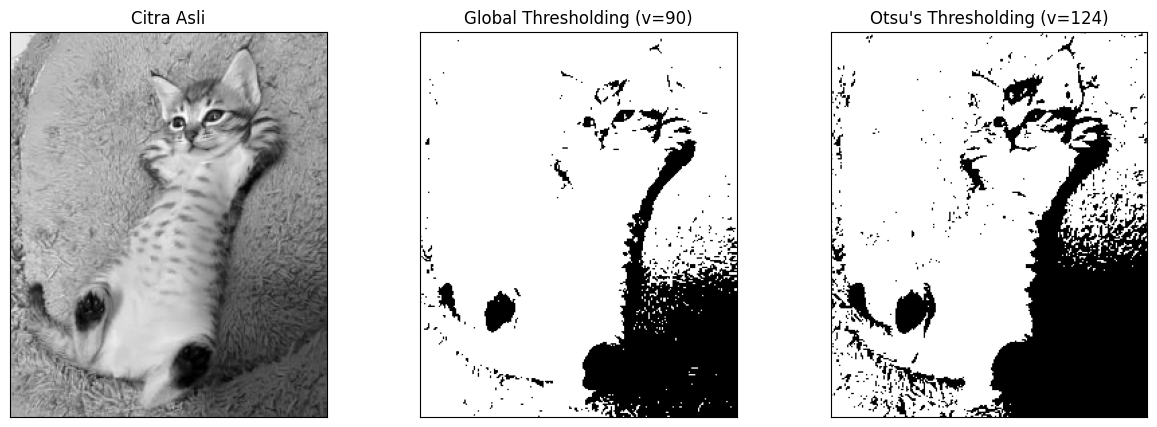

In [8]:
# Load gambar balloon.jpg
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img_balloon = cv2.imread(img_path, 0)

# 1. Hitung histogram
hist = cv2.calcHist([img_balloon], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.sum()

# 2. Hitung total mean (rata-rata intensitas seluruh piksel)
total_mean = np.dot(np.arange(256), hist_norm)

# 3. Iterasi untuk menemukan threshold optimal
max_sigma_b = 0  # Inisialisasi varians antar-kelas maksimum
optimal_thresh = 0

omega_b = 0  # Weight background
mu_b_weighted = 0  # (Weight * mean) background

for t in range(256):
    omega_b += hist_norm[t]  # Hitung weight background
    if omega_b == 0:
        continue

    omega_f = 1 - omega_b  # Hitung weight foreground
    if omega_f == 0:
        break

    mu_b_weighted += t * hist_norm[t]
    mu_b = mu_b_weighted / omega_b

    # Hitung mean foreground dengan cepat
    mu_f = (total_mean - mu_b_weighted) / omega_f

    # 4. Hitung varians antar-kelas (inter-class variance)
    # Rumus: sigma_b^2 = omega_b * omega_f * (mu_b - mu_f)^2
    sigma_b_sq = (omega_b * omega_f * ((mu_b - mu_f) ** 2))

    # 5. Temukan nilai t yang memaksimalkan varians antar-kelas
    if sigma_b_sq > max_sigma_b:
        max_sigma_b = sigma_b_sq
        optimal_thresh = t

print(f"Nilai threshold Otsu's (manual) = {optimal_thresh}")

# 6. Terapkan threshold manual (Binary)
ret, thresh_global_90 = cv2.threshold(img_balloon, 90, 255, cv2.THRESH_BINARY)
ret, thresh_otsu_manual = cv2.threshold(img_balloon, optimal_thresh, 255, cv2.THRESH_BINARY)

# Tampilkan hasil seperti contoh di modul
titles = ['Citra Asli', 'Global Thresholding (v=90)', f"Otsu's Thresholding (v={optimal_thresh})"]
images = [img_balloon, thresh_global_90, thresh_otsu_manual]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Cell 5: Membuat Mask dan Histogram Tersegmentasi

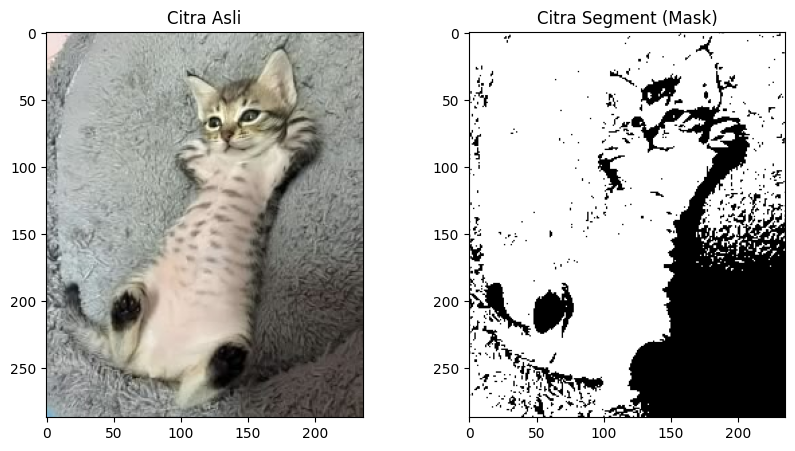

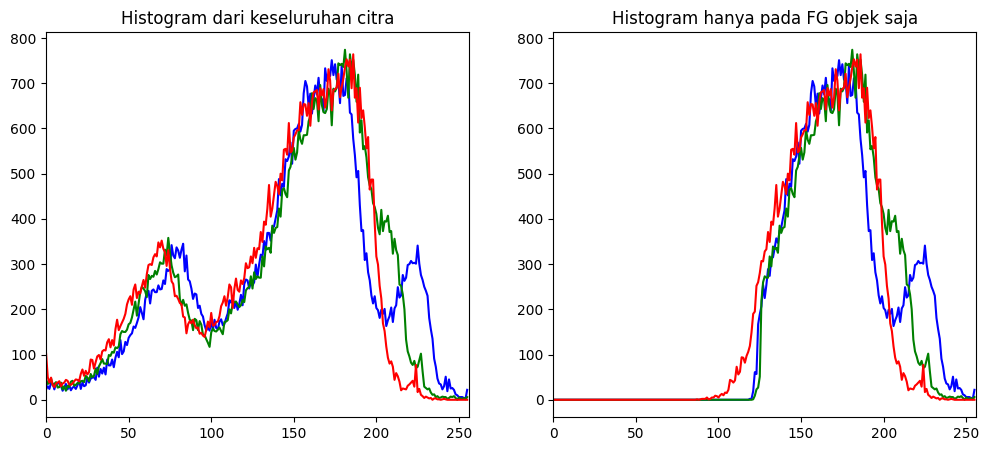

In [10]:
# Load gambar tobacco.jpg
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img_tobacco = cv2.imread(img_path)
img_rgb_tobacco = cv2.cvtColor(img_tobacco, cv2.COLOR_BGR2RGB)

# Buat "Citra Segment" (Mask)
# Kita buat mask dengan Otsu's thresholding pada versi grayscale
img_gray_tobacco = cv2.cvtColor(img_tobacco, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img_gray_tobacco, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan Citra Asli dan Citra Segment (Mask)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_tobacco)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment (Mask)')
plt.show()

# --- Plotting Histogram ---
plt.figure(figsize=(12, 5))
color = ('b', 'g', 'r') # Sesuai plt (RGB)

# 1. Histogram dari keseluruhan citra (mask=None)
plt.subplot(1, 2, 1)
for i, col in enumerate(color):
    # Perhatikan: img_rgb_tobacco, channel [i], mask=None
    hist_full = cv2.calcHist([img_rgb_tobacco], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=col)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# 2. Histogram hanya pada FG objek (menggunakan mask)
plt.subplot(1, 2, 2)
for i, col in enumerate(color):
    # Perhatikan: img_rgb_tobacco, channel [i], mask=mask
    hist_fg = cv2.calcHist([img_rgb_tobacco], [i], mask, [256], [0, 256])
    plt.plot(hist_fg, color=col)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.show()

Cell 6: Segmentasi K-Means dan Isolasi Warna Kuning

Pusat cluster (RGB): [[124 124 116]
 [202 198 188]
 [162 164 157]
 [ 65  61  56]]
Cluster kuning terdeteksi: label 1 (warna: [202 198 188])


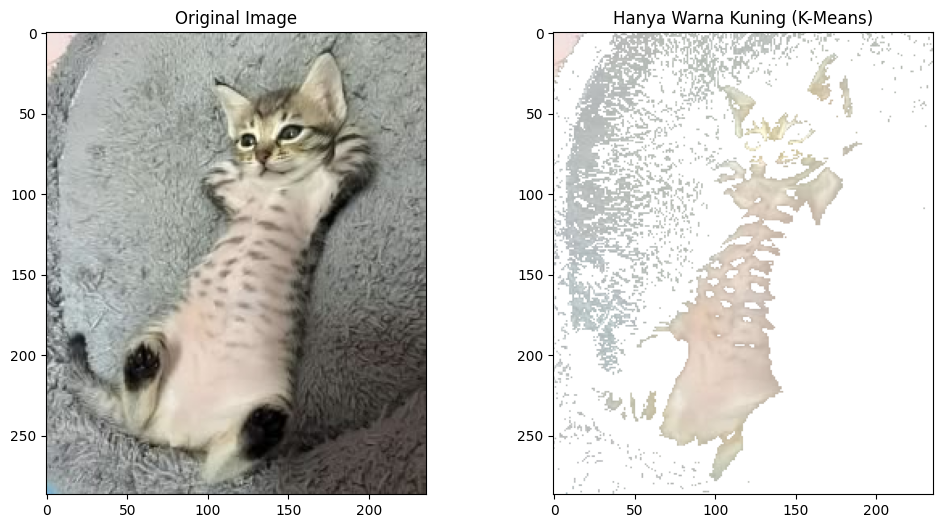

In [12]:
# Load gambar peppers.jpg
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img_peppers = cv2.imread(img_path)
img_rgb_peppers = cv2.cvtColor(img_peppers, cv2.COLOR_BGR2RGB)

# 1. Reshape image dan konversi ke float32
pixel_values = img_rgb_peppers.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# 2. Terapkan K-Means
# Kita coba K=4 (merah, kuning, hijau, background putih)
k = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi centers ke uint8
centers = np.uint8(centers)

# 3. Tentukan cluster mana yang "kuning"
# Kita cari pusat cluster yang paling dekat dengan warna kuning [255, 255, 0]
target_color = np.array([255, 255, 0])
distances = np.linalg.norm(centers - target_color, axis=1)
yellow_cluster_label = np.argmin(distances)

print(f"Pusat cluster (RGB): {centers}")
print(f"Cluster kuning terdeteksi: label {yellow_cluster_label} (warna: {centers[yellow_cluster_label]})")

# 4. Buat gambar baru, set semua piksel non-kuning menjadi putih
# Buat salinan gambar asli
masked_image = np.copy(img_rgb_peppers)

# Ubah ke bentuk flat (vektor)
masked_image_flat = masked_image.reshape((-1, 3))

# Ubah semua piksel yang BUKAN label cluster kuning menjadi putih [255, 255, 255]
masked_image_flat[labels.flatten() != yellow_cluster_label] = [255, 255, 255]

# Kembalikan ke bentuk gambar asli
masked_image_result = masked_image_flat.reshape(img_rgb_peppers.shape)

# 5. Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_peppers)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_result)
plt.title('Hanya Warna Kuning (K-Means)')
plt.show()

Penjelasan Kendala (Tugas 6)



Cell 8: Perbandingan Global vs. Adaptive Thresholding

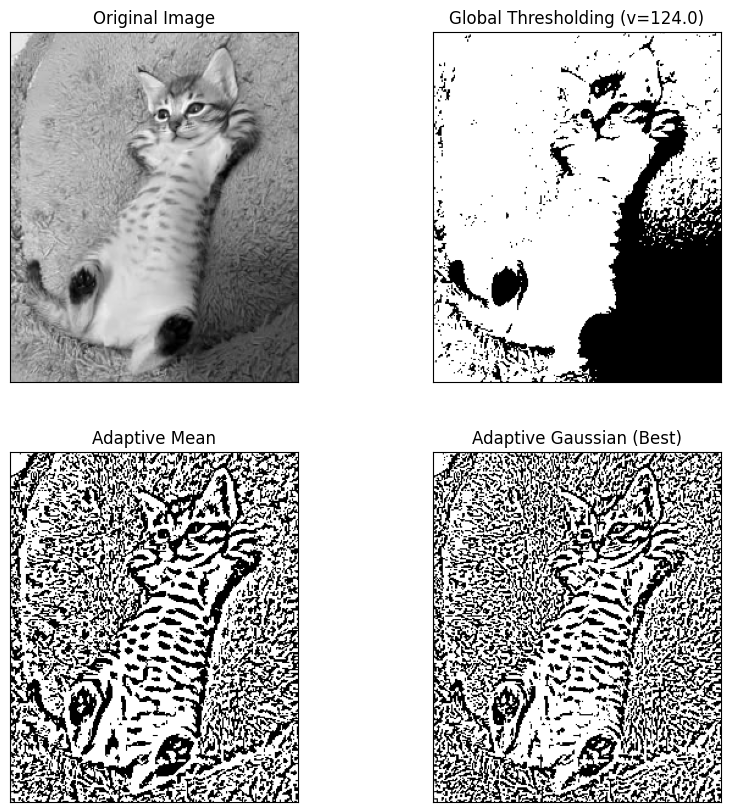

In [16]:
# Load gambar crossword.jpg
img_path = '/content/drive/MyDrive/PCVK/Images/kitten.jpg'
img_cross = cv2.imread(img_path, 0) # Baca grayscale

# 1. Global Thresholding (gagal)
# Kita gunakan Otsu untuk mendapatkan nilai global terbaik
ret_global, thresh_global = cv2.threshold(img_cross, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. Adaptive Mean Thresholding
thresh_adaptive_mean = cv2.adaptiveThreshold(img_cross, 255,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

# 3. Adaptive Gaussian Thresholding (Hasil terbaik)
thresh_adaptive_gaussian = cv2.adaptiveThreshold(img_cross, 255,
                                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                 cv2.THRESH_BINARY, 11, 2)

# Tampilkan hasil perbandingan
titles = ['Original Image', f'Global Thresholding (v={ret_global})',
          'Adaptive Mean', 'Adaptive Gaussian (Best)']
images = [img_cross, thresh_global, thresh_adaptive_mean, thresh_adaptive_gaussian]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()